import module

In [1]:
# basic module
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from copy import deepcopy
from scipy.spatial.distance import euclidean
from scipy import stats
import torch
from dtw import *
from scipy.signal import savgol_filter
from sklearn import mixture
from gmr import GMM
import itertools
from scipy import linalg
import matplotlib as mpl
import matplotlib.colors as mcolors


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



# GMM and GMR on 2D dataset

In [2]:
data = np.load('../../resources/parameters/task_up_combinedweight/estimatedparams.npy')
print("data shape:", data.shape)
force_data = data[:,24,:]
Kp6_data = data[:,6,:]

data shape: (10, 25, 100)


plot the data

(1000,)
(1000,)
(1000, 2)


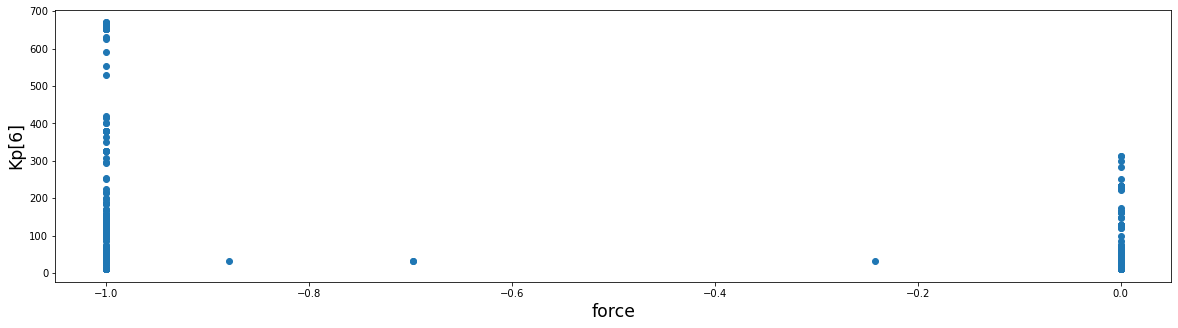

In [3]:
print(force_data.flatten().shape)
print(Kp6_data.flatten().shape)
isample = 1
data_gmm_force = np.concatenate([np.expand_dims(force_data.flatten(),0),np.expand_dims(Kp6_data.flatten(),0)],0).transpose()
print(data_gmm_force.shape)

plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(force_data.flatten(),Kp6_data.flatten())
plt.xlabel("force",fontsize='xx-large')
plt.ylabel("Kp[6]",fontsize='xx-large')
plt.show()

In [4]:
n_gauss = 1
gmmsk = mixture.GaussianMixture(n_components=n_gauss, covariance_type='full')
gmmsk.fit(data_gmm_force)
print("weight",gmmsk.weights_)
print("weight",gmmsk.means_)
print("covariances",gmmsk.covariances_)
gmm = GMM(n_components=n_gauss, random_state=0)
gmm.from_samples(data_gmm_force,init_params="kmeans++")

weight [1.]
weight [[-0.39851515 58.20835728]]
covariances [[[ 2.38989245e-01 -1.65217426e+01]
  [-1.65217426e+01  1.16476366e+04]]]


In [5]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-9., 5.)
    #plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

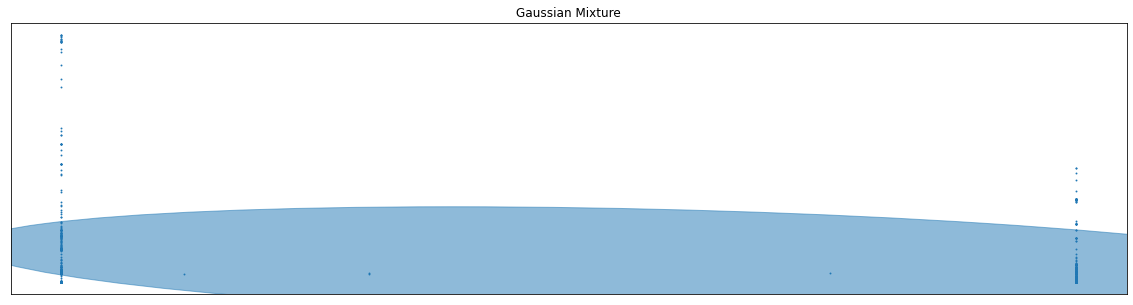

In [6]:
color_iter = itertools.cycle(list(mcolors.TABLEAU_COLORS))
plt.rcParams["figure.figsize"] = (20,5)
plot_results(data_gmm_force, gmmsk.predict(data_gmm_force), gmmsk.means_, gmmsk.covariances_, 0,
             'Gaussian Mixture')

(1000, 1)
(1000, 1)
(1000, 1)


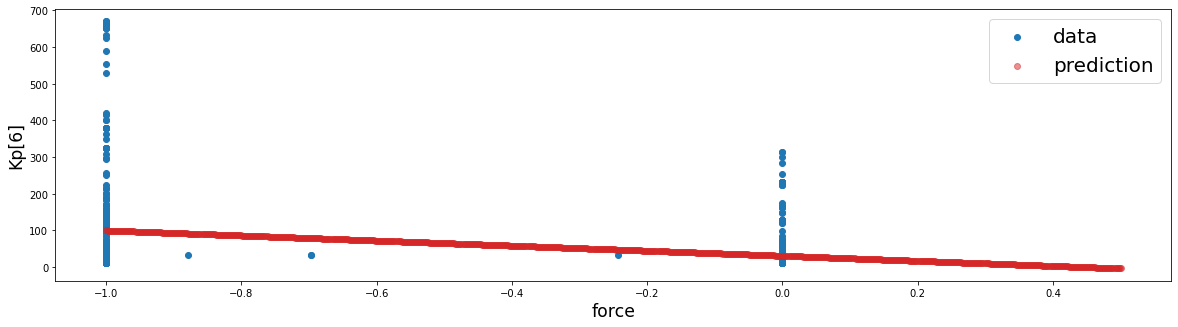

In [7]:

x1 = np.linspace(-1, 0.5, 1000)
x1 = np.expand_dims(x1,1)
print(x1.shape)
x1_index = [0]
x2_predicted_mean = gmm.predict(x1_index, x1)
print(x2_predicted_mean.shape)
print(x1.shape)

plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(force_data.flatten(),Kp6_data.flatten())
plt.scatter(x1[:,0],x2_predicted_mean[:,0],c='tab:red',alpha=0.5)
plt.xlabel("force",fontsize='xx-large')
plt.ylabel("Kp[6]",fontsize='xx-large')
plt.legend(['data','prediction'],fontsize=20)
plt.show()